
# Advertisement on a company website

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model with **Logistic Regression** that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '**Daily Time Spent on Site**': consumer time on site in minutes
* '**Age**': cutomer age in years
* '**Area Income**': Avg. Income of geographical area of consumer
* '**Daily Internet Usage**': Avg. minutes a day consumer is on the internet
* '**Ad Topic Line**': Headline of the advertisement
* '**City**': City of consumer
* '**Male**': Whether or not consumer was male
* '**Country**': Country of consumer
* '**Timestamp**': Time at which consumer clicked on Ad or closed window
* '**Clicked on Ad**': 0 or 1 indicated clicking on Ad
--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--

### Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
%matplotlib inline

**Reading the advertising.csv file and set it to a data frame called ad_data.**

In [51]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [52]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Let's get more information on the advertising data set:

In [53]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [54]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

**Let's create a histogram of the Age**

Text(0.5, 0, 'Age')

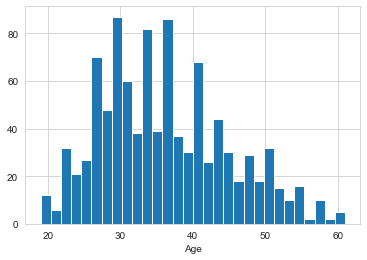

In [55]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

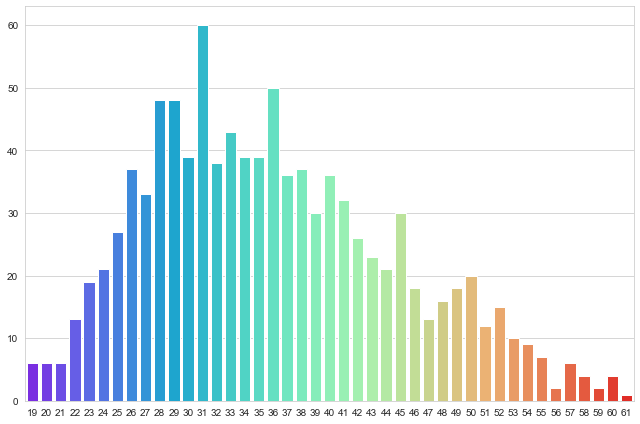

In [56]:
Age = Counter(Age for Age in ad_data['Age'])
items = sorted(Age.items())
x_age_count = [i[:][0] for i in items]
y_age_count = [i[:][1] for i in items]
plt.figure(figsize = (9, 6))
sns.barplot(y = y_age_count, x = x_age_count,palette='rainbow')
plt.tight_layout()

**Creating a jointplot showing Area Income versus Age.**

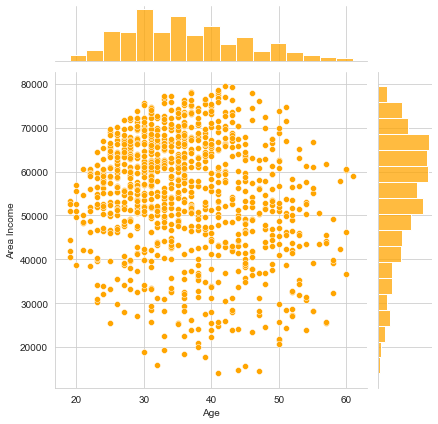

In [57]:
sns.jointplot(x='Age',y='Area Income',data=ad_data, color='orange')

**Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

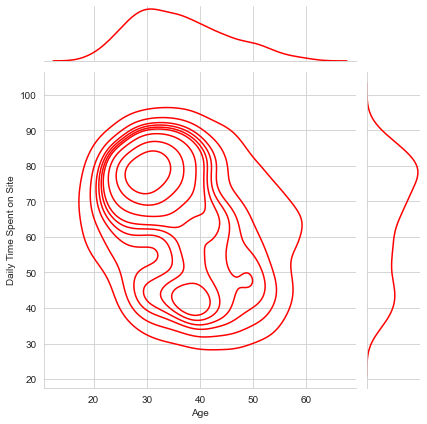

In [58]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

**Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

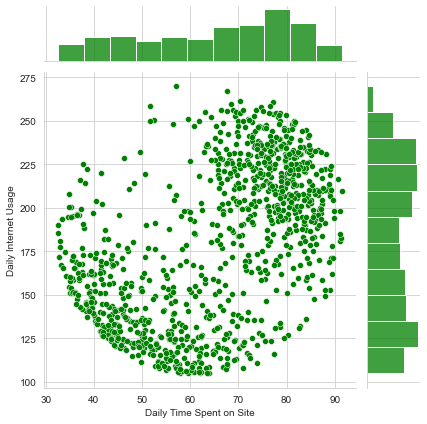

In [59]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

**Finally, let's see a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

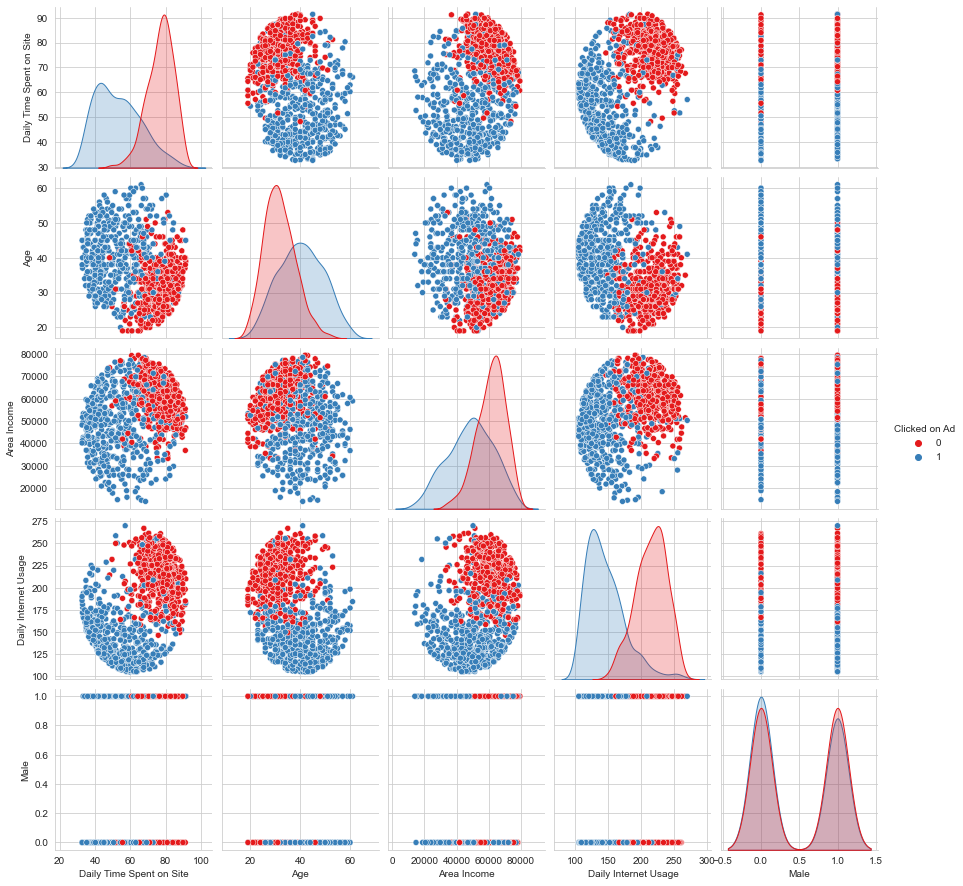

In [60]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='Set1')

**Cleaning data of timestamp**

Let's split the timestamp to Date, Time, Month

In [84]:
Time = ad_data['Timestamp'][0].split()[0]

In [85]:
Time

'2016-03-27'

In [86]:
ad_data['Date'] = ad_data['Timestamp'].apply(lambda x: x.split()[0])

In [87]:
ad_data['Time'] = ad_data['Timestamp'].apply(lambda x: x.split()[1])

In [88]:
ad_data['Month'] = ad_data['Date'].apply(lambda x:x.split('-')[1])

In [89]:
ad_data.loc[(ad_data['Time']<'12:00:00'),'Daytime'] = 'Morning'
ad_data.loc[(ad_data['Time']>= '12:00:00')&(ad_data['Time']<'17:00:00'),'Daytime'] = 'Afternoon'
ad_data.loc[(ad_data['Time']>= '17:00:00')&(ad_data['Time']<'21:00:00'),'Daytime'] = 'Evening'
ad_data.loc[(ad_data['Time']>= '21:00:00')& (ad_data['Time']<'23:55:00'),'Daytime'] = 'Night'

In [98]:
ad_data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,Daytime,Evening,Morning,Night,Evening,Morning,Night,Evening,Morning,Night
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,...,Morning,0,1,0,0,1,0,0,1,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,...,Morning,0,1,0,0,1,0,0,1,0


<AxesSubplot:xlabel='Month', ylabel='count'>

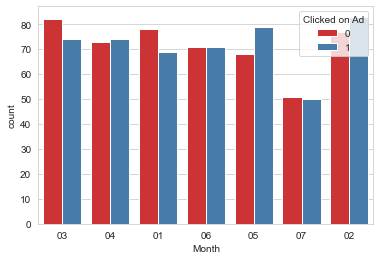

In [99]:
sns.countplot(x=ad_data['Month'],hue=ad_data['Clicked on Ad'],palette='Set1')

Let's convert the daytime to the category with get_dummies method.

In [104]:
Daytime = pd.get_dummies(ad_data['Daytime'],drop_first=True)

In [103]:
ad_data = pd.concat([ad_data,Daytime],axis=1)

In [102]:
# ad_data.head(3)

In [106]:
ad_data.drop(['Daytime'],axis=1,inplace = True)

# Logistic Regression

Now it's time to do a train test split, and train our model!

Let's first train on **Clicked on Ad** column!

**First we split the data into training set and testing set using train_test_split**

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Let's Train and fit a logistic regression model on the training set.**

In [110]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Predictions and Evaluations
**Now let's predict values for the testing data.**

In [116]:
predictions = logmodel.predict(X_test)

**Creating a classification report for the model.**

In [117]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

